<a href="https://colab.research.google.com/github/suman111999/Breast-Cancer-Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


%matplotlib inline

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('BreastCancer_Prognostic_v1.xlsx')
df.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
df.shape

(198, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
ID                           198 non-null int64
Outcome                      198 non-null object
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64


In [ ]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
ID                           198 non-null int64
Outcome                      198 non-null object
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64


In [ ]:
df.isnull().sum()

ID                           0
Outcome                      0
Time                         0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_std_dev               0
texture_std_dev              0
perimeter_std_dev            0
area_std_dev                 0
smoothness_std_dev           0
compactness_std_dev          0
concavity_std_dev            0
concave_points_std_dev       0
symmetry_std_dev             0
fractal_dimension_std_dev    0
Worst_radius                 0
Worst_texture                0
Worst_perimeter              0
Worst_area                   0
Worst_smoothness             0
Worst_compactness            0
Worst_concavity              0
Worst_concave_points         0
Worst_symmetry               0
Worst_fr

In [ ]:
df.isna().values.any()

True

In [ ]:
df=df.fillna(df.mean())

In [ ]:
df.isna().values.any()

False

In [ ]:
df.drop('ID',axis=1,inplace=True)


In [ ]:
df.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [ ]:
#Mapping categorical data to  numerical data
df['Outcome']=df['Outcome'].map({'R':1,'N':0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 34 columns):
Outcome                      198 non-null int64
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64
compactness_std_dev          198 non-null float64

In [ ]:
df.describe()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
count,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.237374,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,0.426552,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.423363
min,0.000000,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,0.000000,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,0.000000,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,0.000000,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,1.000000,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [ ]:
df['Outcome'].value_counts()#imbalanced

0    151
1     47
Name: Outcome, dtype: int64

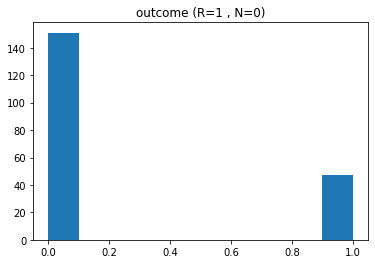

In [ ]:
#R is less than N,imbalanced
plt.hist(df['Outcome'])
plt.title('outcome (R=1 , N=0)')
plt.show()

In [ ]:
X=df.drop('Outcome',axis=1)
X.head()


,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [ ]:
y=df['Outcome']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [ ]:
X_train.head()


,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
139,13,19.55,23.21,128.90,1174.0,0.1010,0.1318,0.1856,0.10210,0.1989,...,142.0,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602,4.0,13.0
80,86,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,...,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,1.2,0.0
19,116,17.14,16.40,116.00,912.7,0.1186,0.2276,0.2229,0.14010,0.3040,...,152.4,1461.0,0.1545,0.3949,0.3853,0.2550,0.4066,0.10590,4.4,1.0
159,11,20.59,21.24,137.80,1320.0,0.1085,0.1644,0.2188,0.11210,0.1848,...,163.2,1760.0,0.1464,0.3597,0.5179,0.2113,0.2480,0.08999,5.5,20.0
90,74,17.42,25.56,114.50,948.0,0.1006,0.1146,0.1682,0.06597,0.1308,...,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,1.5,1.0


In [ ]:
print(X_train.shape)

(138, 33)


In [ ]:
print('WITHOUT FEATURE SELECTION')
lg=LogisticRegression(random_state=0).fit(X_train, y_train)
print('logistic Regression training Accuracy:')
print(lg.score(X_train, y_train))
print('logistic Regression testing Accuracy:')
print(lg.score(X_test, y_test))
print()
    
clf = SVC(random_state=0).fit(X_train, y_train)
print('svc training Accuracy:')
print(clf.score(X_train, y_train))
print('svc testing Accuracy:')
print(clf.score(X_test, y_test))
print()
    
dt= DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train, y_train)#overfitting
print('Decision Tree training Accuracy:')
print(dt.score(X_train, y_train))
print('Decission Tree testing Accuracy:')
print(dt.score(X_test, y_test))
print()
    
r= RandomForestClassifier(random_state=0).fit(X_train, y_train)#overfitting
print('randomforest training Accuracy:')
print(r.score(X_train, y_train))
print('random forest training Accuracy:')
print(r.score(X_test, y_test))
    

WITHOUT FEATURE SELECTION
logistic Regression training Accuracy:
0.8333333333333334
logistic Regression testing Accuracy:
0.7833333333333333

svc training Accuracy:
0.7753623188405797
svc testing Accuracy:
0.7333333333333333

Decision Tree training Accuracy:
1.0
Decission Tree testing Accuracy:
0.65

randomforest training Accuracy:
1.0
random forest training Accuracy:
0.7666666666666667


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s= scaler.transform(X_test)

In [ ]:
print('AFTER NORMALIZATION')
lg1=LogisticRegression().fit(X_train_s, y_train)
print('logistic Regression training Accuracy:')
print(lg1.score(X_train_s, y_train))
print('logistic Regression testing Accuracy:')
print(lg1.score(X_test_s, y_test))
print()
    
clf1 = SVC().fit(X_train_s, y_train)
print('svc training Accuracy:')
print(clf1.score(X_train_s, y_train))
print('svc testing Accuracy:')
print(clf1.score(X_test_s, y_test))

AFTER NORMALIZATION
logistic Regression training Accuracy:
0.8768115942028986
logistic Regression testing Accuracy:
0.8

svc training Accuracy:
0.8260869565217391
svc testing Accuracy:
0.75


In [ ]:
#cross_val_score of model r
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=r, X=X_train, y=y_train, cv=5)
np.mean(all_accuracies)

0.7894179894179894

In [ ]:
#cross_val_score of lg1
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=lg1, X=X_train, y=y_train, cv=5)
np.mean(all_accuracies)

0.7965608465608466

<h1>feature selection using random forest feature of getting feature importance</h1>

In [ ]:
f=list(X_train.columns)

In [ ]:
#getting ranking of importanc of feature using random forest model
featimp = pd.Series(r.feature_importances_, index=f).sort_values(ascending=False)
featimp

Time                         0.062944
Worst_smoothness             0.045700
Lymph_Node_Status            0.044078
Worst_radius                 0.035920
compactness_std_dev          0.035427
perimeter_mean               0.035278
perimeter_std_dev            0.034844
texture_std_dev              0.034696
symmetry_mean                0.034298
fractal_dimension_mean       0.032382
Tumor_Size                   0.031945
smoothness_mean              0.031924
Worst_perimeter              0.031189
Worst_texture                0.030535
Worst_area                   0.030154
Worst_symmetry               0.029661
Worst_concavity              0.029423
texture_mean                 0.028930
smoothness_std_dev           0.028791
fractal_dimension_std_dev    0.026962
concave_points_mean          0.026945
area_mean                    0.026405
symmetry_std_dev             0.025759
Worst_fractal_dimension      0.024548
radius_std_dev               0.024179
Worst_compactness            0.023787
compactness_

In [ ]:
#selecting top 10 important feature
f1=['Time','Worst_smoothness','Lymph_Node_Status','Worst_radius','compactness_std_dev','perimeter_mean','perimeter_std_dev','texture_std_dev',
  'symmetry_mean','fractal_dimension_mean']

In [ ]:
X_0=X[f1]

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_0, y,test_size=.3, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_s0 = scaler.fit_transform(X_train0)
X_test_s0= scaler.transform(X_test0)

In [ ]:
print('AFTER NORMALIZATION')
lg1=LogisticRegression().fit(X_train_s0, y_train)
print('logistic Regression training Accuracy:')
print(lg1.score(X_train_s0, y_train))
print('logistic Regression testing Accuracy:')
print(lg1.score(X_test_s0, y_test))
    
clf1 = SVC().fit(X_train_s0, y_train)
print('svc training Accuracy:')
print(clf1.score(X_train_s0, y_train))
print('svc testing Accuracy:')
print(clf1.score(X_test_s0, y_test))

AFTER NORMALIZATION
logistic Regression training Accuracy:
0.8260869565217391
logistic Regression testing Accuracy:
0.8166666666666667
svc training Accuracy:
0.8333333333333334
svc testing Accuracy:
0.7833333333333333


In [ ]:
r0= RandomForestClassifier().fit(X_train0, y_train0)#overfitting
print(r0.score(X_train0, y_train0))
print(r0.score(X_test0, y_test0))

1.0
0.7666666666666667


In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=r0, X=X_train0, y=y_train0, cv=5)
np.mean(all_accuracies)

0.797089947089947

<h1>feature selction using Heatmap</h1>

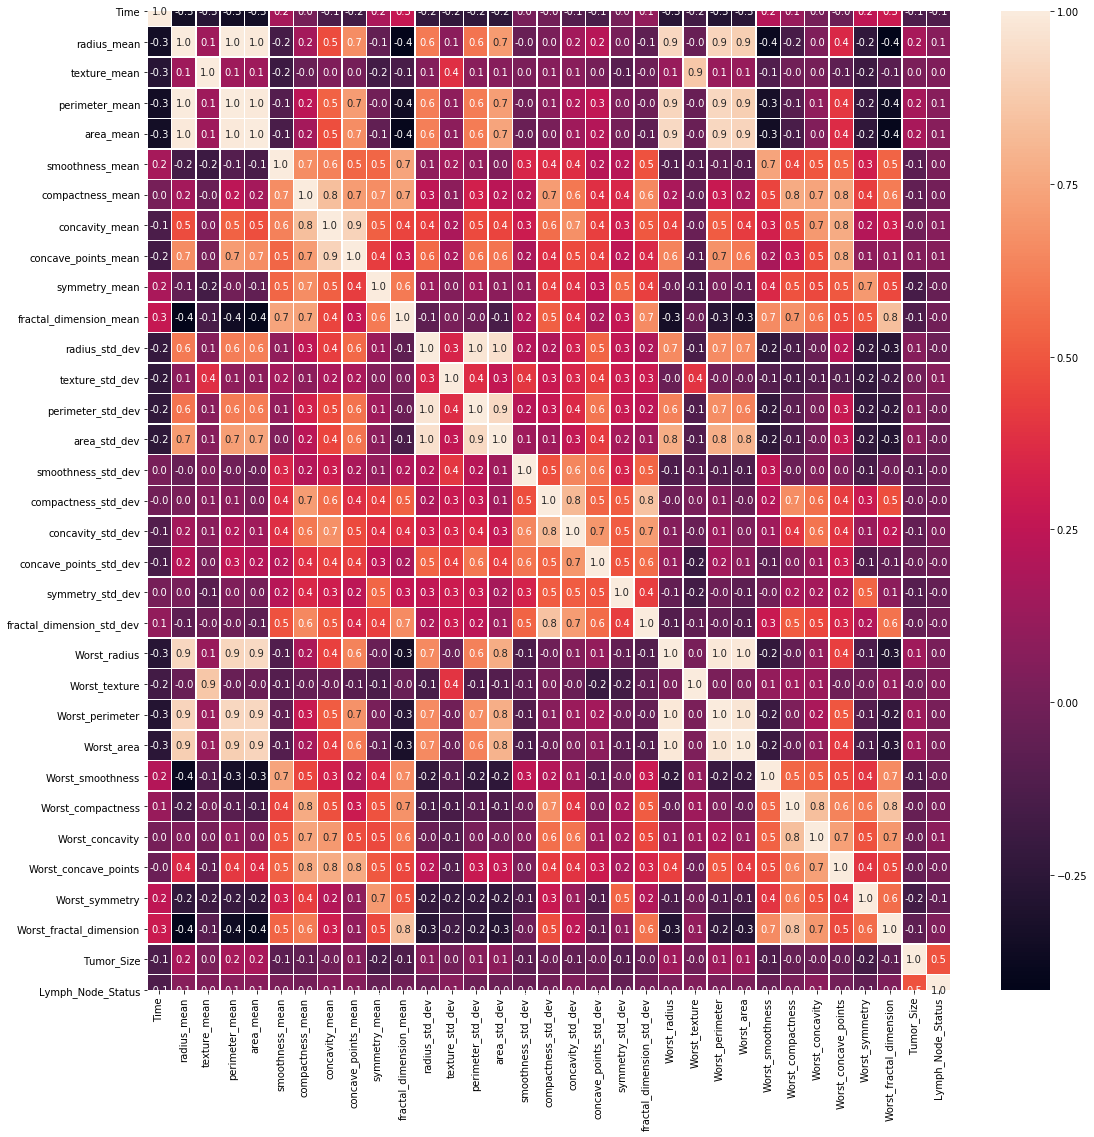

In [ ]:

fi,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 33 columns):
Time                         198 non-null int64
radius_mean                  198 non-null float64
texture_mean                 198 non-null float64
perimeter_mean               198 non-null float64
area_mean                    198 non-null float64
smoothness_mean              198 non-null float64
compactness_mean             198 non-null float64
concavity_mean               198 non-null float64
concave_points_mean          198 non-null float64
symmetry_mean                198 non-null float64
fractal_dimension_mean       198 non-null float64
radius_std_dev               198 non-null float64
texture_std_dev              198 non-null float64
perimeter_std_dev            198 non-null float64
area_std_dev                 198 non-null float64
smoothness_std_dev           198 non-null float64
compactness_std_dev          198 non-null float64
concavity_std_dev            198 non-null float

<h>As it can be seen in heat map figure:</h> 
<p>radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean</p>
<p>Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean.</p>
<p>Apart from these, radius_std_dev, perimeter_std_dev and area_sstd_dev are correlated and I only use area_std_dev.</p> 
<p>radius_worst, perimeter_worst and area_worst are correlated so I use area_worst.</p> 
<p>Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst.</p> 
<p>Compactness_std_dev, concavity_std_dev and concave points_std_dev so I use concavity_std_dev.</p> 
<p>texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.</p>

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_std_dev','perimeter_std_dev','Worst_radius','Worst_perimeter','Worst_compactness','Worst_concave_points','compactness_std_dev','concave_points_std_dev','Worst_texture','Worst_area']
X_1 = X.drop(drop_list1,axis = 1 )         
X_1.head()

,Time,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_std_dev,area_std_dev,smoothness_std_dev,concavity_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_smoothness,Worst_concavity,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,31,27.60,1013.0,0.09489,0.1086,0.1865,0.06333,1.8900,71.55,0.004433,0.03233,0.01694,0.003495,0.1195,0.3140,0.2677,0.08113,5.0,5.0
1,61,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,3.0,2.0
2,116,17.44,1373.0,0.08836,0.1255,0.2333,0.06010,0.6105,82.15,0.006167,0.03300,0.03094,0.005039,0.1188,0.3414,0.4334,0.09067,2.5,0.0
3,123,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300,2.0,0.0
4,27,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678,3.5,0.0


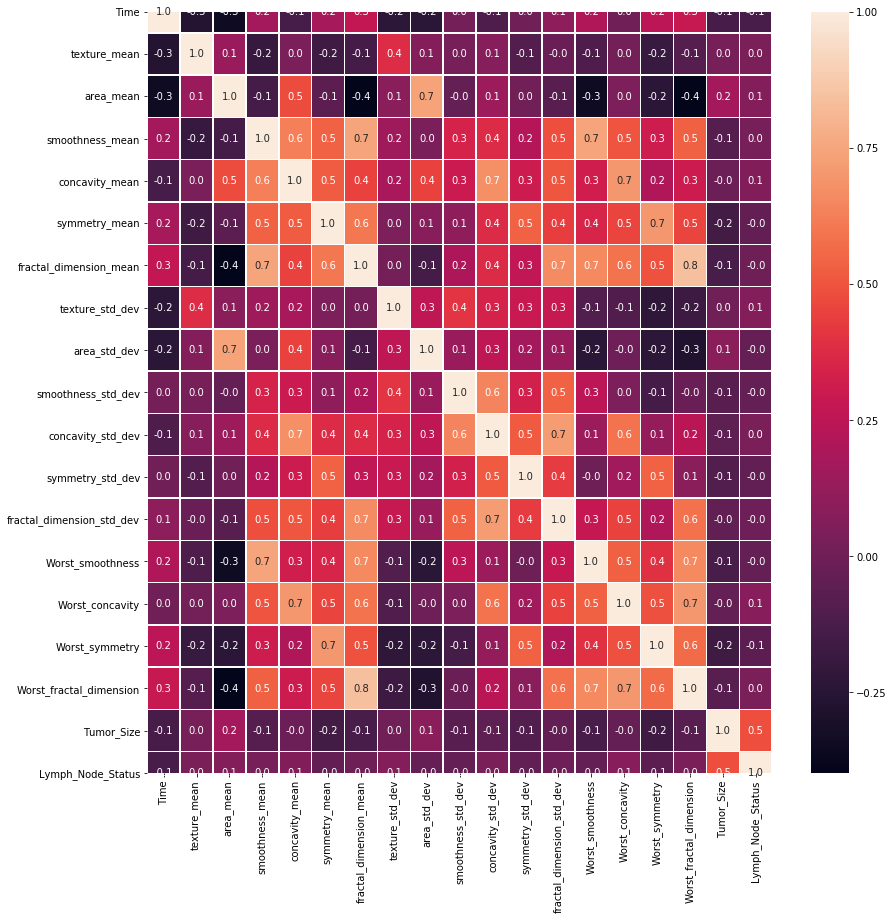

In [ ]:
#after dropping feature which is less important,there is no correlation between features
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
X_1.shape

(198, 19)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=.3,random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_s1 = scaler.fit_transform(X_train1)
X_test_s1= scaler.transform(X_test1)

In [ ]:
print('AFTER NORMALIZATION')
lg1=LogisticRegression().fit(X_train_s1, y_train)
print('logistic Regression training Accuracy:')
print(lg1.score(X_train_s1, y_train))
print('logistic Regression testing Accuracy:')
print(lg1.score(X_test_s1, y_test))
    
clf1 = SVC().fit(X_train_s1, y_train)
print('svc training Accuracy:')
print(clf1.score(X_train_s1, y_train))
print('svc testing Accuracy:')
print(clf1.score(X_test_s1, y_test))

AFTER NORMALIZATION
logistic Regression training Accuracy:
0.8333333333333334
logistic Regression testing Accuracy:
0.8166666666666667
svc training Accuracy:
0.8260869565217391
svc testing Accuracy:
0.7833333333333333


In [ ]:
r1= RandomForestClassifier().fit(X_train1, y_train1)#overfitting
print(r1.score(X_train1, y_train1))
print(r1.score(X_test1, y_test1))

1.0
0.8


In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=r1, X=X_train1, y=y_train1, cv=5)
np.mean(all_accuracies)

0.7973544973544973

<h1>Tunning</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}    
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.786, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.786, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_score_) 

0.7753968253968253


In [ ]:
grid_predictions = grid.predict(X_test)  
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        44
           1       0.00      0.00      0.00        16

    accuracy                           0.73        60
   macro avg       0.37      0.50      0.42        60
weighted avg       0.54      0.73      0.62        60



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


<p>Using random forest model without feature selction</p>

In [ ]:
rf_random = RandomizedSearchCV(estimator = r, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
 # Fit the random search model
rf_random.fit(X_train, y_train)
rf_random .best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


0.8188405797101449

<p>Using random forest model with feature selction using random forest property to find importance of feature</p>

In [ ]:
rf_random0 = RandomizedSearchCV(estimator = r0, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
 # Fit the random search model
rf_random0.fit(X_train0, y_train0)
rf_random0.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


0.8260869565217392

<p>Using random forest model with feature selction using heatmap</p>

In [ ]:
rf_random1 = RandomizedSearchCV(estimator = r1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
 # Fit the random search model
rf_random1.fit(X_train1, y_train1)
rf_random1.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


0.8260869565217392

<h1>Evalution</h1>

In [ ]:
y_predr=r.predict(X_test)
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,y_predr)
print(c_m)
tp=c_m[0][0]
tn=c_m[1][1]
fn=c_m[1][0]
fp=c_m[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[44  0]
 [14  2]]
testin score: 0.7666666666666667


<p>True positive is 43<\p>
<p>True negative is 4<\p>
<p>False positive is 1<\p>
<p>False negative is 12<\p>

In [ ]:
y_predr0=r0.predict(X_test0)
from sklearn.metrics import confusion_matrix
c_m0=confusion_matrix(y_test,y_predr0)
print(c_m0)
tp=c_m0[0][0]
tn=c_m0[1][1]
fn=c_m0[1][0]
fp=c_m0[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[42  2]
 [12  4]]
testin score: 0.7666666666666667


In [ ]:
y_predr1=r1.predict(X_test1)
from sklearn.metrics import confusion_matrix
c_m1=confusion_matrix(y_test1,y_predr1)
print(c_m1)
tp=c_m1[0][0]
tn=c_m1[1][1]
fn=c_m1[1][0]
fp=c_m1[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[44  0]
 [12  4]]
testin score: 0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        44
           1       1.00      0.12      0.22        16

    accuracy                           0.77        60
   macro avg       0.88      0.56      0.54        60
weighted avg       0.82      0.77      0.69        60



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predr0))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.67      0.25      0.36        16

    accuracy                           0.77        60
   macro avg       0.72      0.60      0.61        60
weighted avg       0.75      0.77      0.73        60



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_predr1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        44
           1       1.00      0.25      0.40        16

    accuracy                           0.80        60
   macro avg       0.89      0.62      0.64        60
weighted avg       0.84      0.80      0.75        60



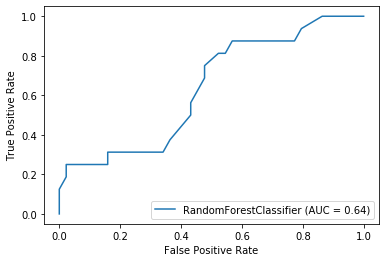

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(r, X_test, y_test)

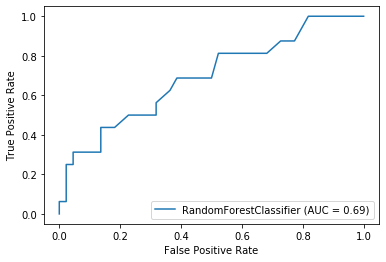

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(r0, X_test0, y_test)

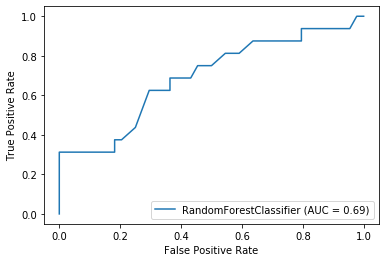

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(r1, X_test1, y_test1)

In [ ]:
r1.predict(X_test1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

<h1>after tunning,this is also a model, we can find confusin matrix and many more</h1>

In [ ]:
y_predrf=rf_random.predict(X_test)
from sklearn.metrics import confusion_matrix
c_m_=confusion_matrix(y_test,y_predrf)
print(c_m_)
tp=c_m_[0][0]
tn=c_m_[1][1]
fn=c_m_[1][0]
fp=c_m_[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[44  0]
 [12  4]]
testin score: 0.8


In [ ]:
y_predrf0=rf_random0.predict(X_test0)
from sklearn.metrics import confusion_matrix
c_m00=confusion_matrix(y_test0,y_predrf0)
print(c_m0)
tp=c_m00[0][0]
tn=c_m00[1][1]
fn=c_m00[1][0]
fp=c_m00[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[44  0]
 [13  3]]
testin score: 0.7833333333333333


In [ ]:
y_predrf1=rf_random1.predict(X_test1)
from sklearn.metrics import confusion_matrix
c_m11=confusion_matrix(y_test1,y_predrf1)
print(c_m11)
tp=c_m11[0][0]
tn=c_m11[1][1]
fn=c_m11[1][0]
fp=c_m11[0][1]
print("testin score:",(tp+tn)/(tp+tn+fn+fp))

[[44  0]
 [12  4]]
testin score: 0.8
